In [1]:
import spynnaker8 as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt
n_neurons = 50
simtime = 5000
inp1 = [simtime/2,simtime/4*3]
inp2 = [simtime/4,simtime/4*3]
xor = [simtime/4,simtime/2]
sim.setup(timestep=0.1)
pre_pop = sim.Population(n_neurons,sim.IF_curr_exp(),label="Pre")
post_pop = sim.Population(n_neurons,sim.IF_curr_exp(),label="Post")
pre_noise = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp1),label="Noise_Pre")
pre_noise2 = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp2),label="Noise_Pre2")
post_noise = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp1),label="Noise_Post")
post_noise2 = sim.Population(n_neurons,sim.SpikeSourceArray(spike_times=inp2),label="Noise_Post2")
pre_pop.record(["spikes",'v'])
post_pop.record(["spikes",'v'])
%matplotlib inline

2022-05-07 12:27:23 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-05-07 12:27:23 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-05-07 12:27:23 WARNING: /home/bbpnrsoa/reports has 9 old reports that have not been closed
2022-05-07 12:27:23 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2022-05-07 12:27:23 INFO: Setting time scale factor to 10.
2022-05-07 12:27:23 INFO: Setting machine time step to 100 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


In [2]:
training = sim.Population(n_neurons, sim.SpikeSourceArray(spike_times=xor),label="Training")
sim.Projection(pre_noise,pre_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0))
sim.Projection(post_noise,post_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0))
sim.Projection(pre_noise2,pre_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0))
sim.Projection(post_noise2,post_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=2.0))

sim.Projection(training,pre_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=5.0,delay=1.0))
sim.Projection(training,post_pop,sim.OneToOneConnector(),
              synapse_type=sim.StaticSynapse(weight=5.0,delay=5.0))

projection from pre Training to post Post with connector OneToOneConnector()

In [3]:
timing_rule = sim.SpikePairRule(tau_plus=20.0,tau_minus=20.0,A_plus=0.5,A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0,w_min=0.0)
stdp_model = sim.STDPMechanism(timing_dependence=timing_rule,weight_dependence=weight_rule,
                              weight=0.0,delay=3.0)
stdp_projection = sim.Projection(pre_pop,post_pop,sim.OneToOneConnector(),synapse_type=stdp_model)

In [4]:
sim.run(simtime)
pre_neo = pre_pop.get_data(variables=["spikes"])
pre_spikes = pre_neo.segments[0].spiketrains
post_neo = post_pop.get_data(variables=["spikes"])
post_spikes = post_neo.segments[0].spiketrains
pre_v = pre_pop.get_data("v")
post_v = post_pop.get_data("v")
print(stdp_projection.getWeights())
sim.end()


2022-05-07 12:27:26 INFO: Starting execution process
2022-05-07 12:27:26 INFO: Simulating for 50000 0.1ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
There_is_a_flower_within_my_heart,_Daisy,_Daisy!_Planted___
 one_day_by_a_glancing_dart,_Planted_by_Daisy_Bell!_Whether_
2022-05-07 12:27:26 INFO: Time 0:00:00.011420 taken by SpynnakerSplitterSelector
Adding delay extensions as required
she_loves_me_or_loves_me_not,_Sometimes_it's_hard_to_tell;_
 Yet_I_am_longing_to_share_the_lot_Of_beautiful_Daisy_Bell!_
2022-05-07 12:27:26 INFO: Time 0:00:00.009312 taken by DelaySupportAdder
2022-05-07 12:27:29 INFO: Time 0:00:03.125001 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
Daisy,_Daisy,_Give_me_your_answer,_do!_I'm_half_crazy,_All_
 for_the_love_of_you!_It_won't_be_a_stylish_marriage,_I_____
2022-05-07 12:27:38 INFO: Time 0:00:08.715734 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning

[2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188 2.38867188
 2.38867188 2.38867188]


/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(spiketrain,
/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/pyNN/utility/plotting.py:106: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argum

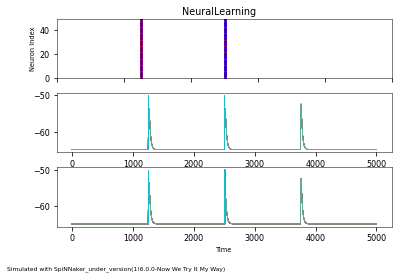

In [5]:
line_properties = [{'color': 'r','markersize':4},
{'color': 'b','markersize':2}]
plt.figure()
plot.Figure(
    # plot spikes
    plot.Panel(pre_spikes, post_spikes, yticks=True, xlim=(0, simtime),line_properties = line_properties),
    plot.Panel(pre_v.segments[0].filter(name='v')[0],yticks=True,xticks=True,legend=None,xlabel="Time"),
    plot.Panel(post_v.segments[0].filter(name='v')[0],yticks=True,xticks=True,legend=None,xlabel="Time"),
    title="NeuralLearning",
    annotations="Simulated with {}".format(sim.name())
).save("XORLearningPlotColor")

plt.show()
